In [1]:
%matplotlib widget
import numpy as np
import scipy
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds_fn = "E:/research_data/2022_harmonic_gravity_waves/preprocessed_images/bore_ex.nc"
ds = xr.open_dataset(ds_fn)

In [3]:
ds.sel(time="2018-02-11T08")

<xarray.Dataset>
Dimensions:   (x: 2304, y: 4064, time: 1)
Coordinates:
    lon       (x, y, time) float32 ...
    lat       (x, y, time) float32 ...
  * time      (time) datetime64[ns] 2018-02-11T08:37:31
Dimensions without coordinates: x, y
Data variables:
    rad255    (x, y, time) float64 ...
    senzen    (x, y, time) float32 ...
    senazi    (x, y, time) float32 ...
    senrange  (x, y, time) float32 ...
    solzen    (x, y, time) float32 ...
    solazi    (x, y, time) float32 ...
    lunzen    (x, y, time) float32 ...
    lunazi    (x, y, time) float32 ...

In [4]:
img_array = ds.sel(time="2018-02-11T08").isel(time=0).rad255.values

In [5]:
img_array.shape

(2304, 4064)

In [6]:
img_array_norm = (img_array - img_array.mean()) / img_array.std()

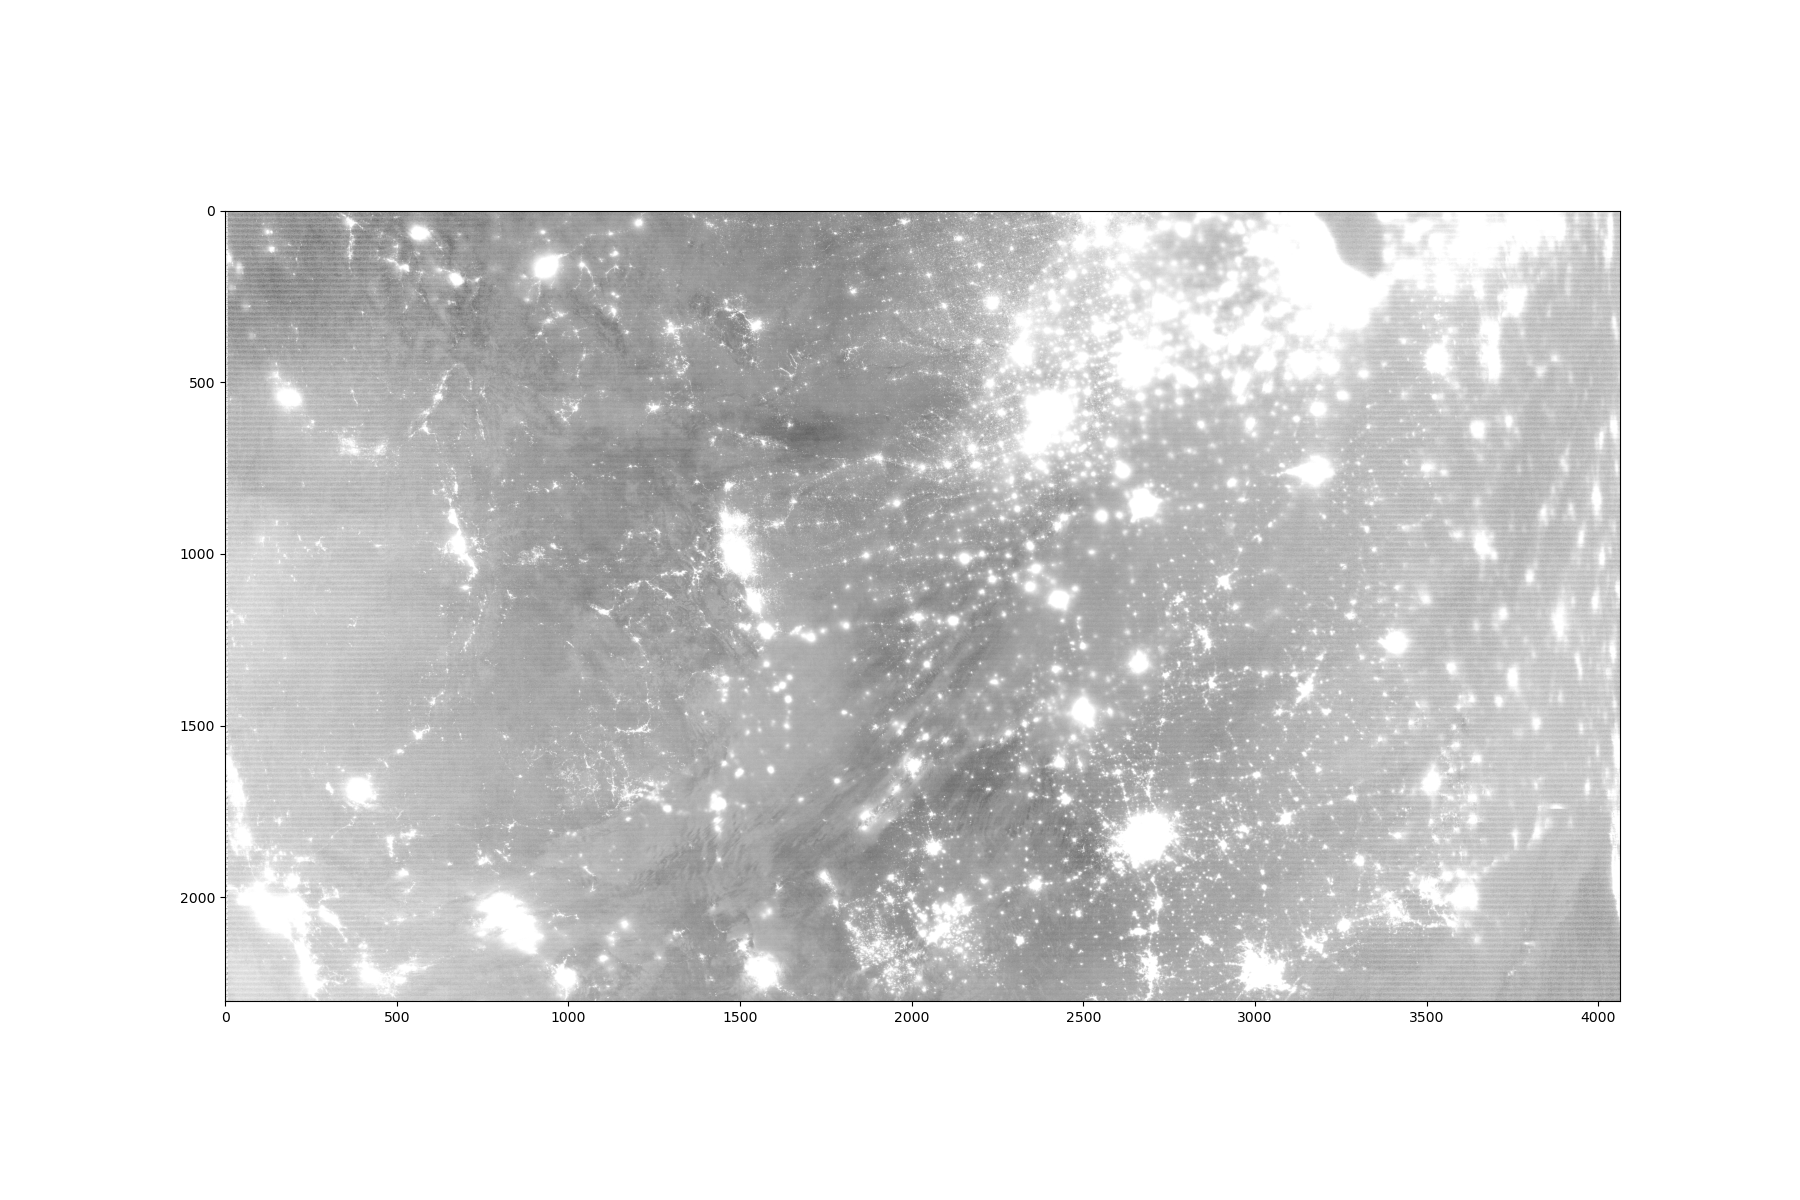

In [7]:
F, ax = plt.subplots(figsize=(18, 12))
ax.imshow(img_array, cmap='gray')

In [8]:
def col_denoise(column, freq_center):
    col_transform = scipy.fft.rfft(column)
    window = scipy.signal.windows.general_gaussian(31, 2, 2)
    filt_func = np.ones(len(col_transform))
    filt_func[freq_center-15:freq_center+16] = 1 - window
    cut_col_transform = col_transform * filt_func
    cut_col = scipy.fft.irfft(cut_col_transform)
    return cut_col

In [37]:
denoised_img_array = np.zeros(img_array.shape)
for i in range(img_array.shape[1]):
    denoised_img_array[:, i] = col_denoise(img_array[:, i], 143)

In [36]:
from PIL import Image
denoised_im = Image.fromarray(denoised_img_array).convert('L')
denoised_im.save("E:/research_data/2022_harmonic_gravity_waves/preprocessed_images/denoised_full_ims/2018-02-11T08-37-31_denoised.png")

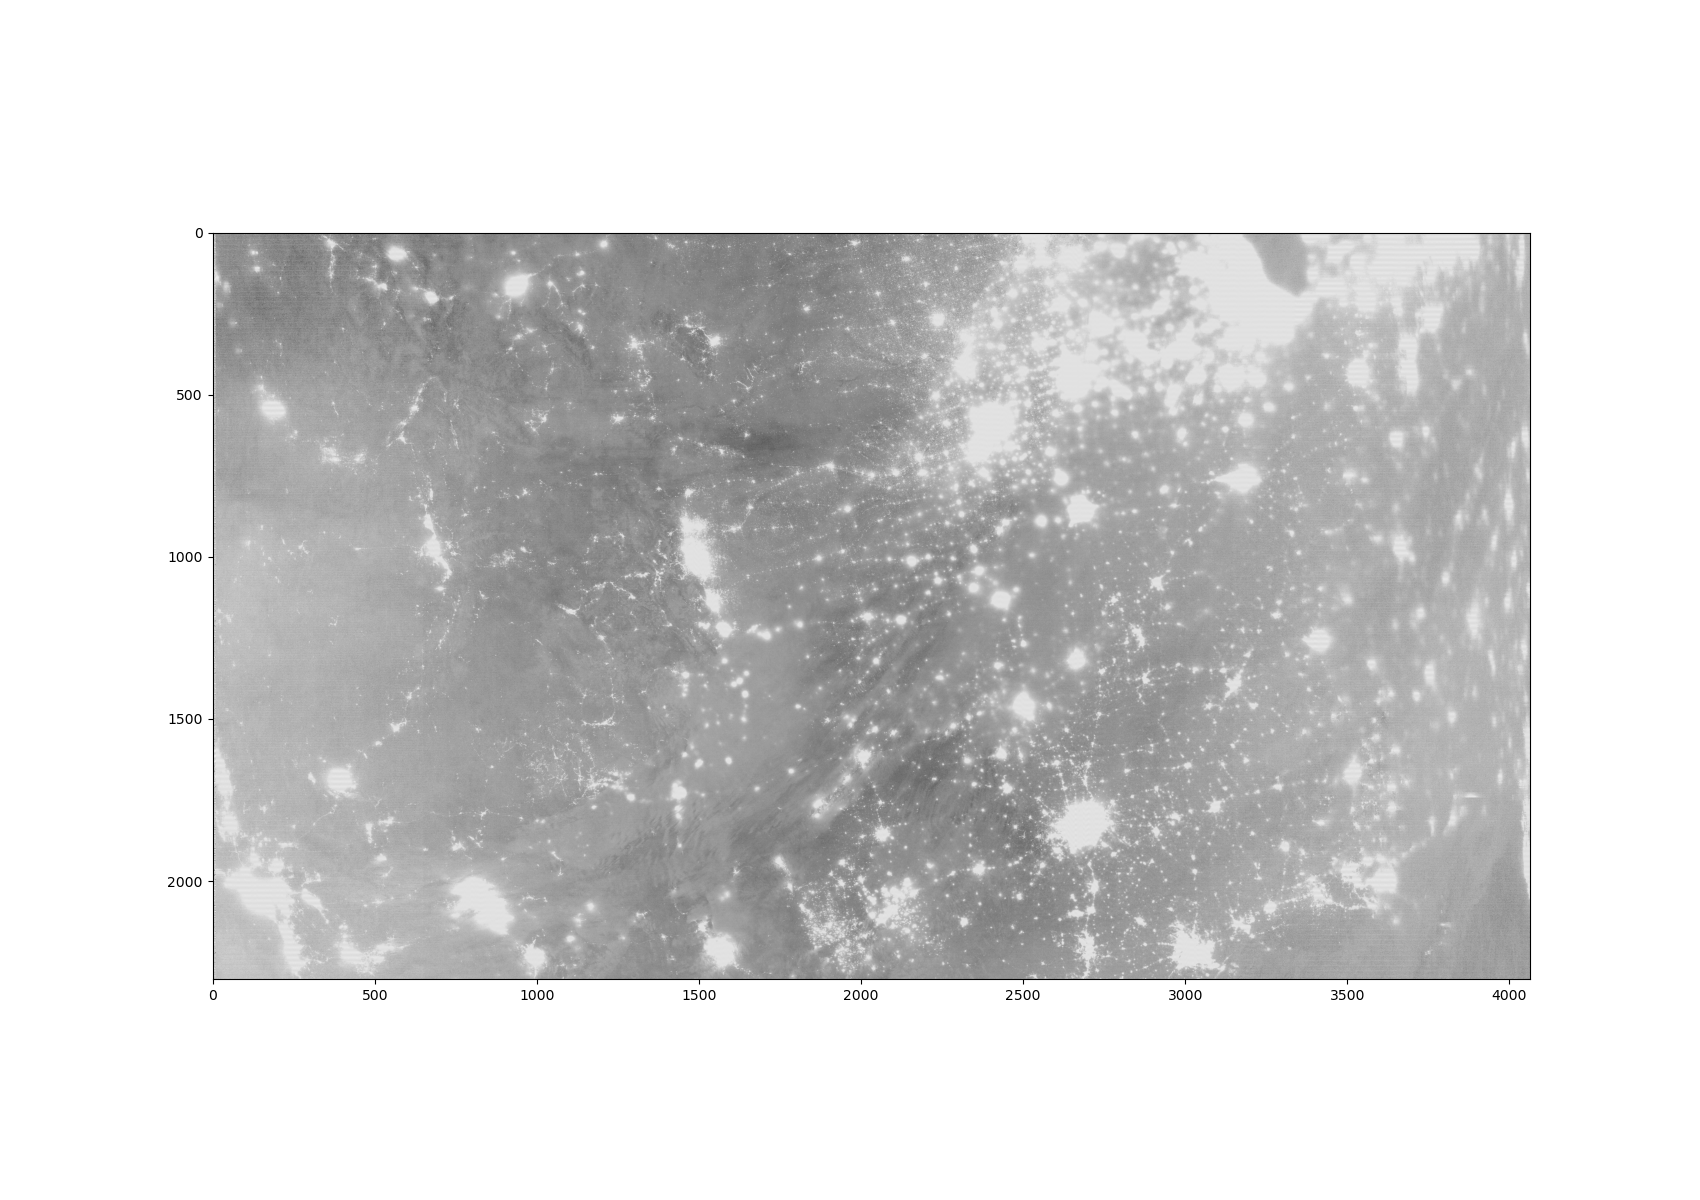

In [10]:
F, ax = plt.subplots(figsize=(17, 12))
ax.imshow(denoised_img_array, cmap='gray')

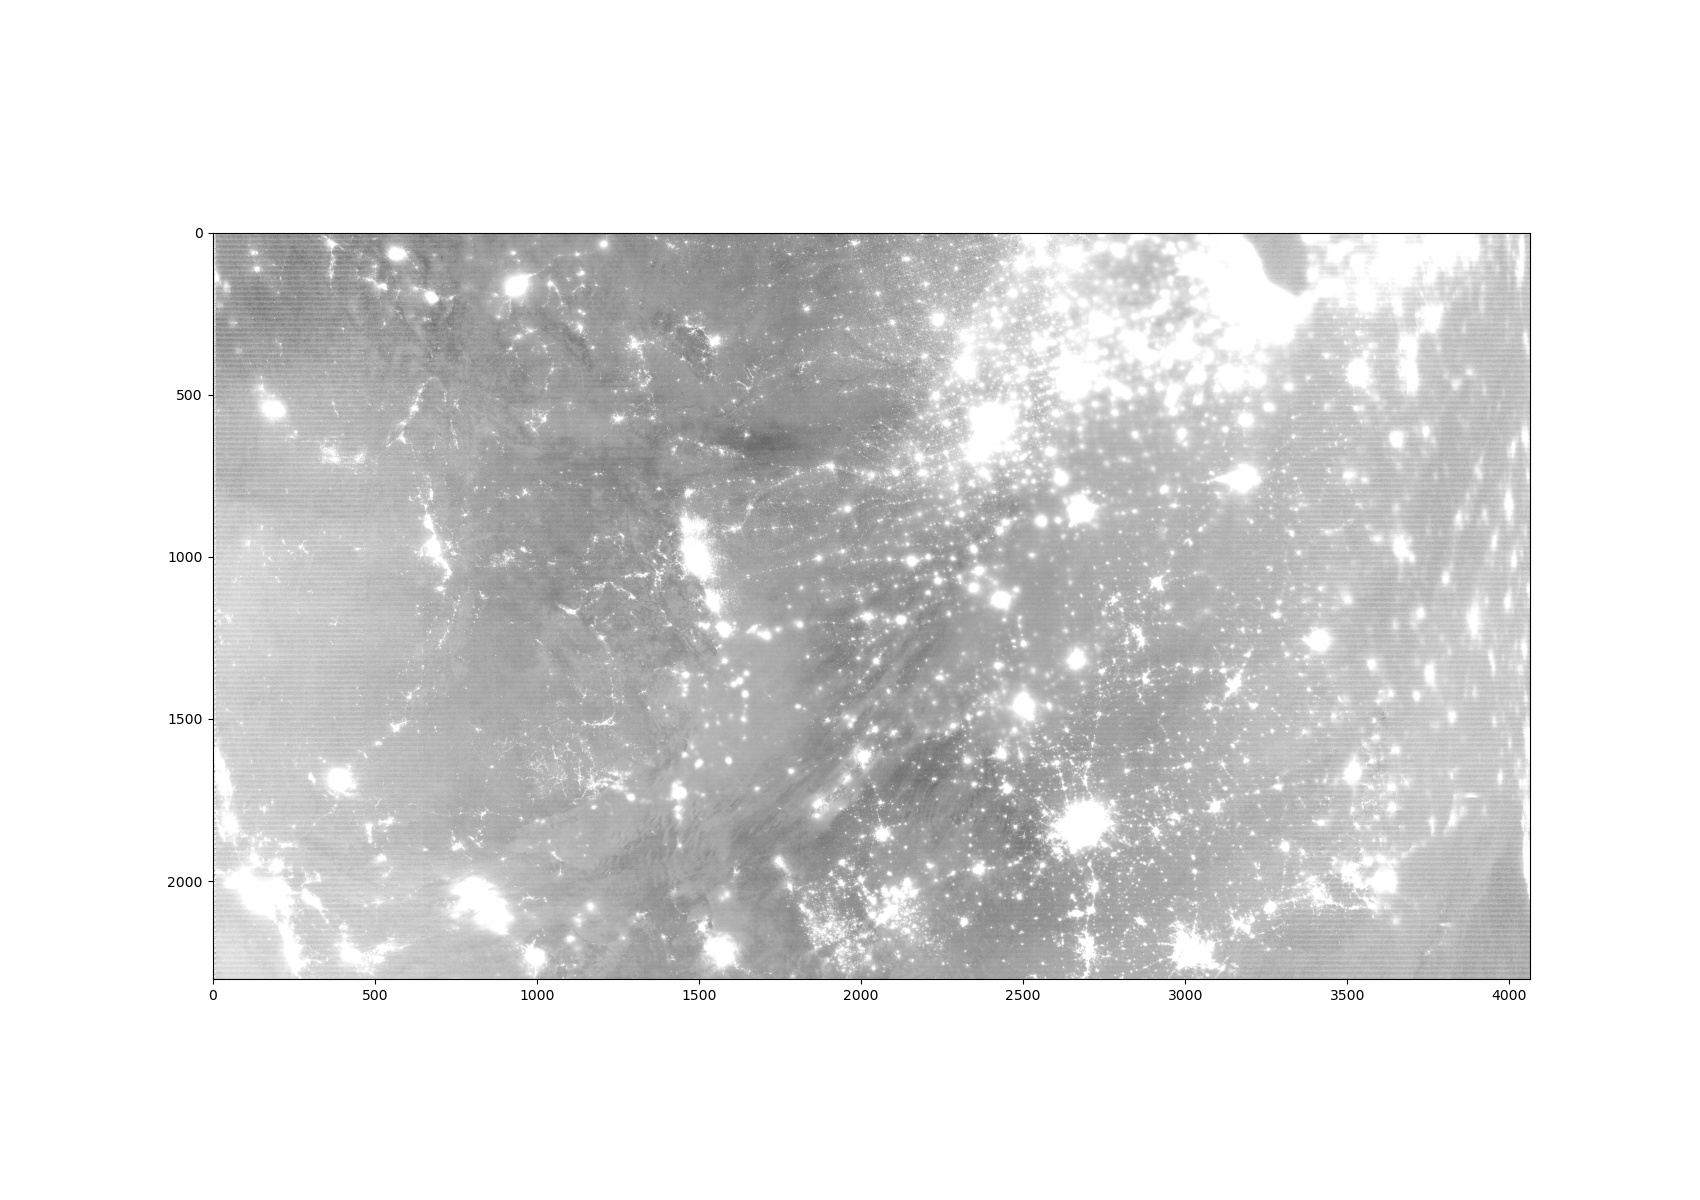

In [11]:
F, ax = plt.subplots(figsize=(17, 12))
ax.imshow(img_array, cmap='gray')

In [12]:
cut_col = col_denoise(img_array[:, 40], 143)

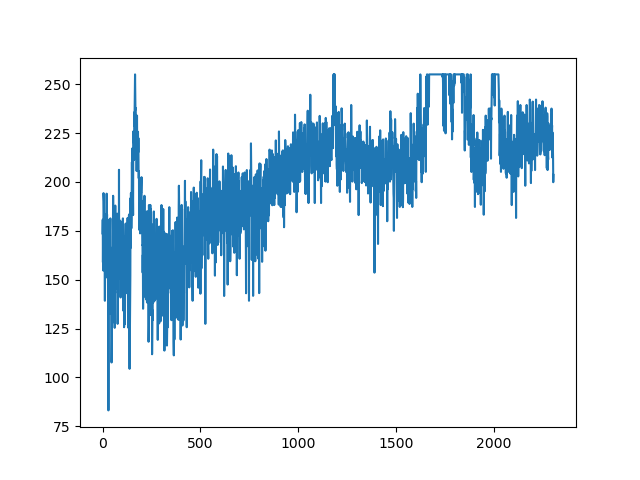

In [13]:
F, ax = plt.subplots()
ax.plot(img_array[:, 40])

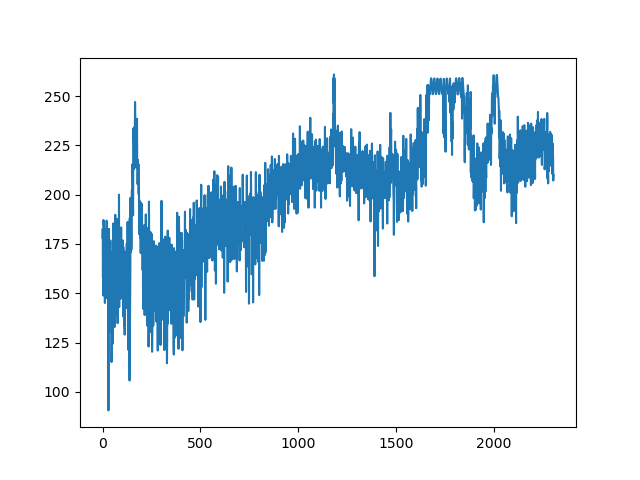

In [14]:
F, ax = plt.subplots()
ax.plot(cut_col)

In [15]:
col_transform = scipy.fft.rfft(img_array_norm[:, 40])

In [16]:
N = img_array.shape[0]

In [17]:
col_transform.shape

(1153,)

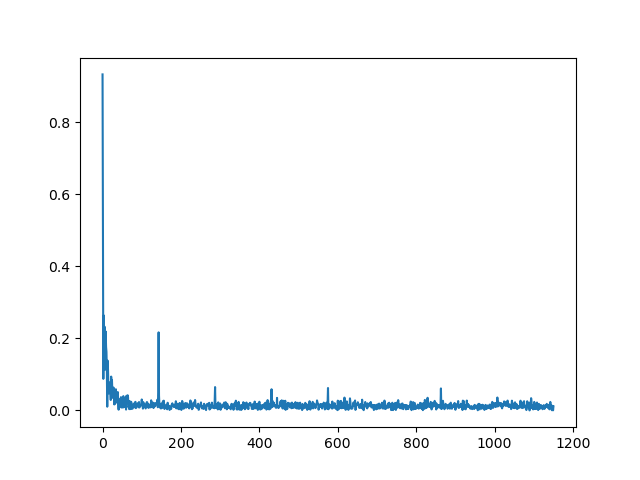

In [18]:
F, ax = plt.subplots()
ax.plot(2.0/N * np.abs(col_transform)[1:N//2])

In [19]:
window = scipy.signal.windows.general_gaussian(31, 2, 2)
filt_func = np.ones(1153)
filt_func[128:159] = 1 - window

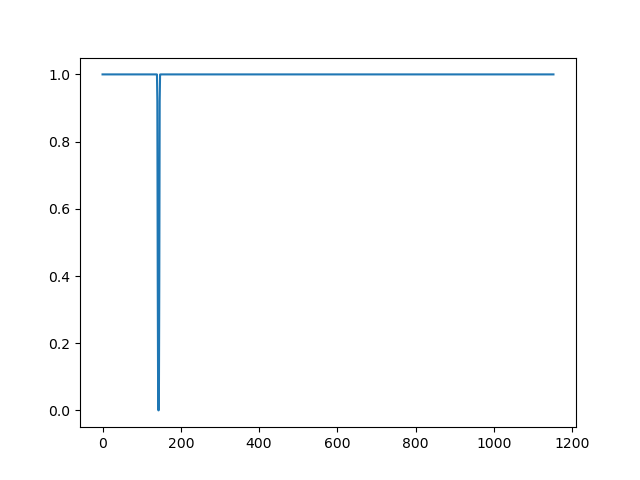

In [20]:
F, ax = plt.subplots()
plt.plot(filt_func)

In [21]:
cut_col_transform = col_transform.copy() * filt_func

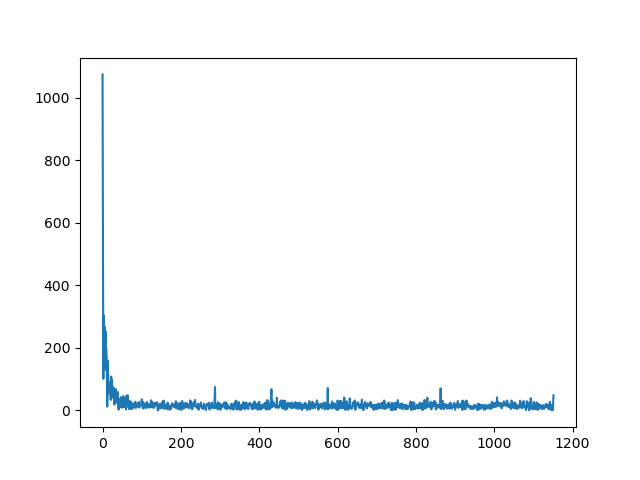

In [22]:
F, ax = plt.subplots()
plt.plot(np.abs(cut_col_transform)[1:])

In [23]:
cut_col = scipy.fft.irfft(cut_col_transform)

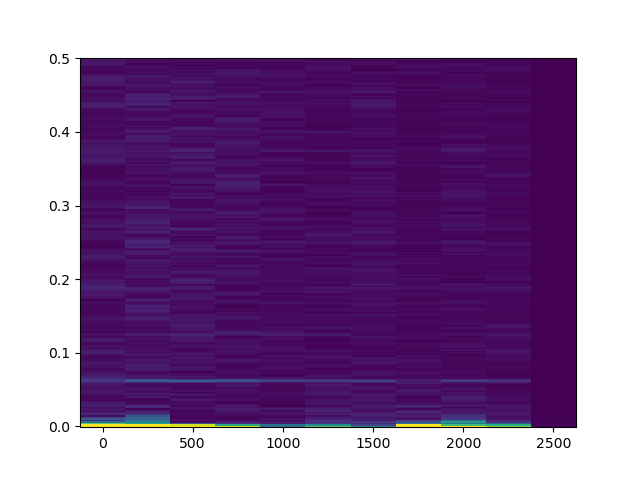

In [33]:
col = img_array_norm[:, 40]
f, t, col_stft = scipy.signal.stft(col - col.mean(), nperseg=500)
F, ax = plt.subplots()
ax.pcolormesh(t, f, np.abs(col_stft), vmin=0, vmax=0.5)

In [27]:
f, t, col_spec = scipy.signal.spectrogram(img_array_norm[:, 40])

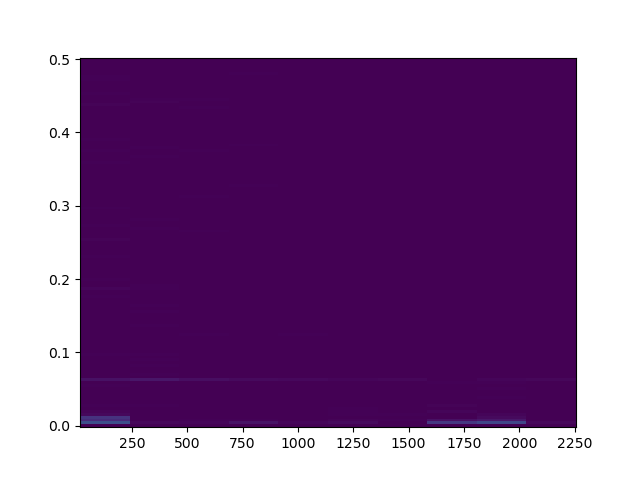

In [29]:
F, ax = plt.subplots()
ax.pcolormesh(t, f, col_spec, vmin=0, vmax=255)